# Multiple Linear Regression

## A little bit of theory

### Model
y = b0 + b1*x1 + b2*x2 + ... + bn*xn

y - dependent variable

xn - independent variable

bn - coeficient

### Statistical Significance

There are two hypothesis H0 and H1 and we try to prove if hypothesis H0 is true or H1 is true. Let's look at the next picture.

**alpha** is confident or significant level and we set it for any case differently (in a case of human life, 5% is too high - we need to be more confident).

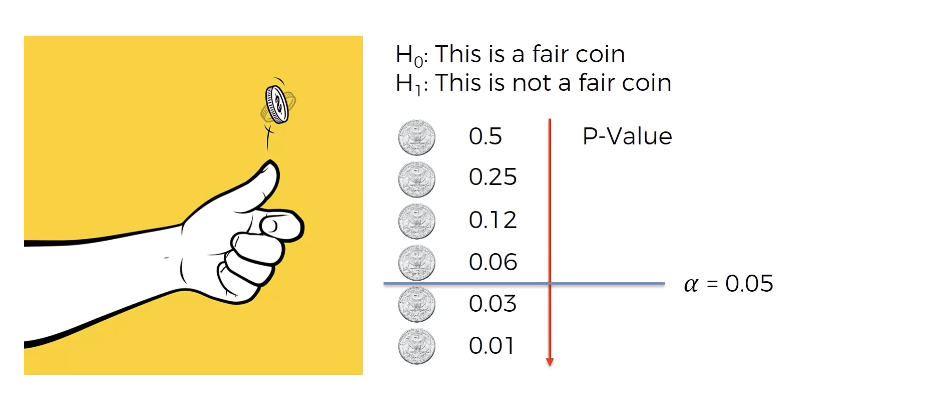

## Building a model
We should throw out some features (it could be thrash + you should be able to explain your model. There are of course other reasons :)). Choosing of right features is crucial for good model.

5 methods of building models:
1. All-in   
    1. not a terminus technicus 
    2. use when you have to, prior knowledge, preparation for 2.
2. Backward Elimination (the most fastest)
    1. set significant level SL
    2. fit full model
    3. take the highest P-value of features. If P > SL continue else end
    4. remove the feature and go to 2.2
3. Forward Selection
    1. set significant level SL
    2. fit all simple regression model (one feature by one) and select the one with the lowest P-value
    3. create new models by adding just one feature to the selected one and repeat until P < SL, then use the previous one model (the one without just added feature)
4. Bidirectional Elimination
    1. set significant level SL to stay SLSTAY and SL to enter SLENTER (eg. both 0.05)
    2. perform step 2 of Forward selection (new feature has to have P < SLENTER)
    3. perform all steps of Backward elimination (old features has to have P < SLSTAY) and go back to step 2 and repeat until no new feature can enter and no old variables can exit

5. Score Comparison
    1. set a criterion (eg. Akaike criterion)
    2. create all possible models
    3. select the one which fit the criterion best

The First three are also known as Stepwise Regression.

We don't care about this because this decision and all needed steps makes model class we choose.

## Importing the libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [38]:
dataset = pd.read_csv('c:/Users/to068616/Desktop/DEVELOP/UDEMY COURSE/multiple_linear_regression/50_Startups.csv')

In [39]:
x = dataset.iloc[:, :-1].values #take all raws and all columns but the last
y = dataset.iloc[:, -1].values #take all raws and take the last column

## Handling categorical data

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

## Splitting the dataset into the Training set and Test set

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Predicting the Multiple Linear Regression model on Training set

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()# this makes also multipe linear regression
lr.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [43]:
y_pred = lr.predict(X_test)
np.set_printoptions(precision=2)#round to two decimal
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis=1))# join horizontaly

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


In [45]:
print(X_train)

[[0.0 1.0 0.0 55493.95 103057.49 214634.81]
 [0.0 0.0 1.0 46014.02 85047.44 205517.64]
 [0.0 1.0 0.0 75328.87 144135.98 134050.07]
 [1.0 0.0 0.0 46426.07 157693.92 210797.67]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 1000.23 124153.04 1903.93]
 [0.0 0.0 1.0 542.05 51743.15 0.0]
 [0.0 0.0 1.0 65605.48 153032.06 107138.38]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [0.0 1.0 0.0 61994.48 115641.28 91131.24]
 [1.0 0.0 0.0 63408.86 129219.61 46085.25]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [1.0 0.0 0.0 23640.93 96189.63 148001.11]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 15505.73 127382.3 35534.17]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [1.0 0.0 0.0 64664.71 139553.16 137962.62]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [1.0 0.0 0.0 28754.33 118546.05 172795.67]
 [1.

## Make a single prediction

In [47]:
lr.predict([[0.0, 1.0, 0.0, 55493.95, 103057.49, 214634.81]])

print(lr.coef_)
print(lr.intercept_)

[ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]
42467.529248549545
